In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
df = pd.read_csv("laptop_data.csv")
df

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [3]:
print(df["Weight"].value_counts())

2.2kg     121
2.1kg      58
2.4kg      44
2.3kg      41
2.5kg      38
         ... 
3.25kg      1
4.7kg       1
1.55kg      1
1.18kg      1
4.0kg       1
Name: Weight, Length: 179, dtype: int64


## Data Preprocessing
- An unnecessary column of index
- ScreenResolution has text in it, should be divided.
- Weight's KG should be deleted
- Ram's GB should be deleted
- Inches has outliers: 18.4, 17, 14.1, 11.3 (Should they be deleted?)
- Outliers in CPU?
- Memory should be divided in space & type

In [4]:
df.drop(columns=["Unnamed: 0"], inplace=True)

In [5]:
df["Ram"] = df["Ram"].str.replace("GB", "")
df["Weight"] = df["Weight"].str.replace("kg", "")
df["Ram"].astype("int16")
df["Weight"].astype("float64")

0       1.37
1       1.34
2       1.86
3       1.83
4       1.37
        ... 
1298    1.80
1299    1.30
1300    1.50
1301    2.19
1302    2.20
Name: Weight, Length: 1303, dtype: float64

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_35496\941010651.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Price"])


<AxesSubplot:xlabel='Price', ylabel='Density'>

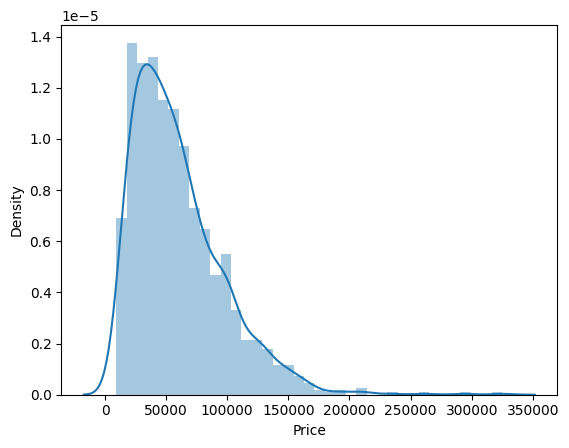

In [7]:
sns.distplot(df["Price"])

<AxesSubplot:>

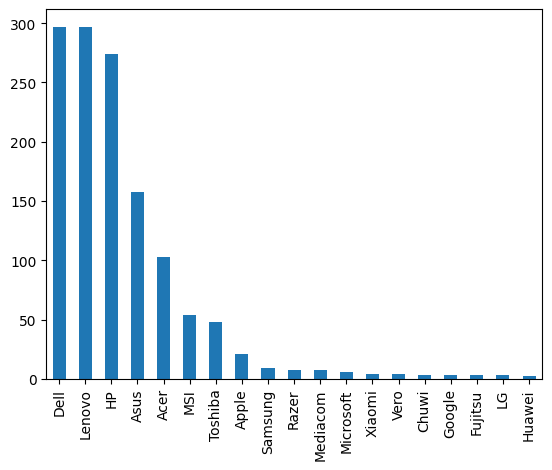

In [8]:
df["Company"].value_counts().plot(kind="bar")

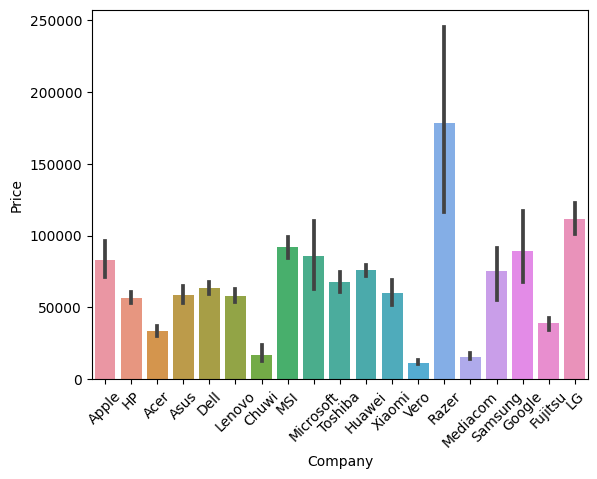

In [9]:
sns.barplot(x="Company", y="Price", data=df)
plt.xticks(rotation=45)
plt.show()

<AxesSubplot:>

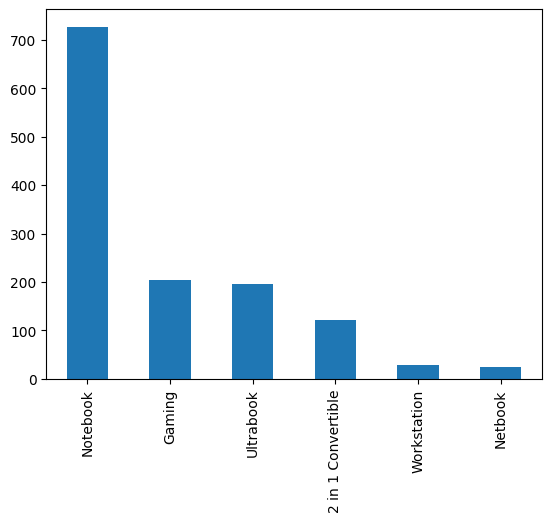

In [10]:
df["TypeName"].value_counts().plot(kind="bar")

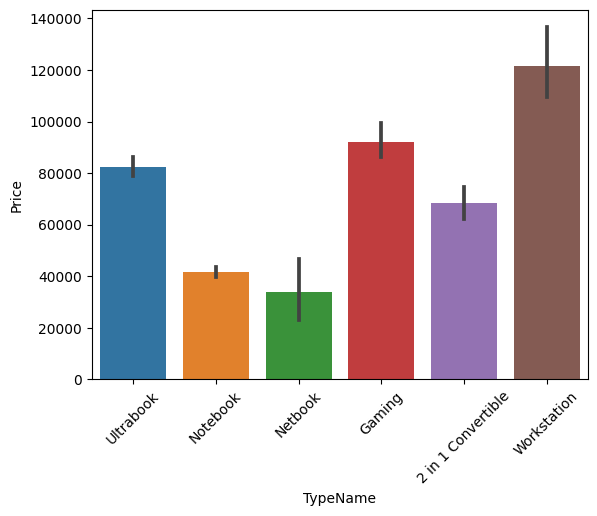

In [11]:
sns.barplot(x="TypeName", y="Price", data=df)
plt.xticks(rotation=45)
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_35496\2945259378.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Inches"])


<AxesSubplot:xlabel='Inches', ylabel='Density'>

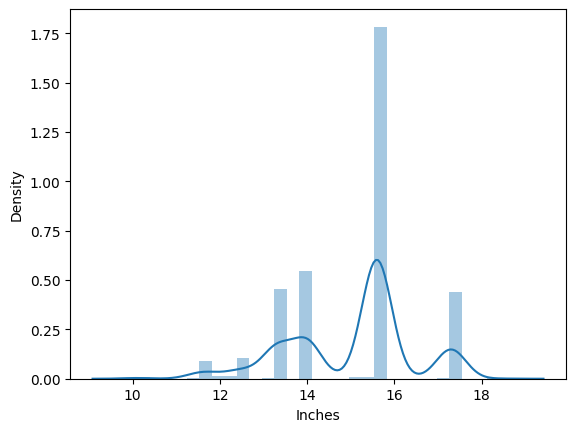

In [12]:
sns.distplot(df["Inches"])

<AxesSubplot:xlabel='Inches', ylabel='Price'>

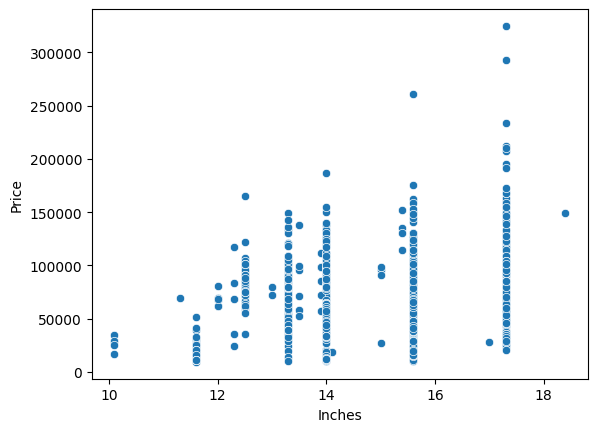

In [13]:
sns.scatterplot(x=df["Inches"], y=df["Price"])

In [14]:
df["Touchscreen"] = df["ScreenResolution"].apply(lambda x: 1 if "Touchscreen" in x else 0)
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0


<AxesSubplot:>

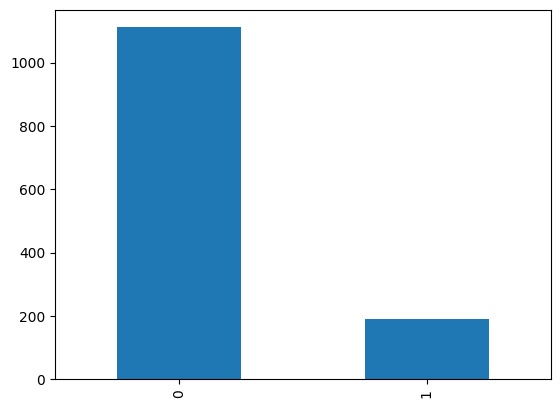

In [15]:
df["Touchscreen"].value_counts().plot(kind="bar")

<AxesSubplot:xlabel='Touchscreen', ylabel='Price'>

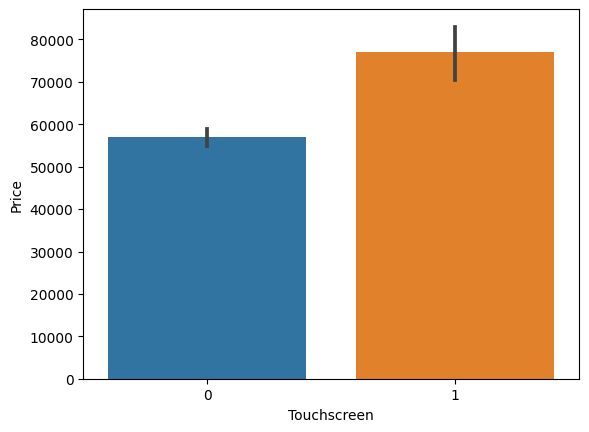

In [16]:
sns.barplot(x=df["Touchscreen"], y=df["Price"])

In [17]:
df["IPS"] = df["ScreenResolution"].apply(lambda x: 1 if "IPS" in x else 0)
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


<AxesSubplot:>

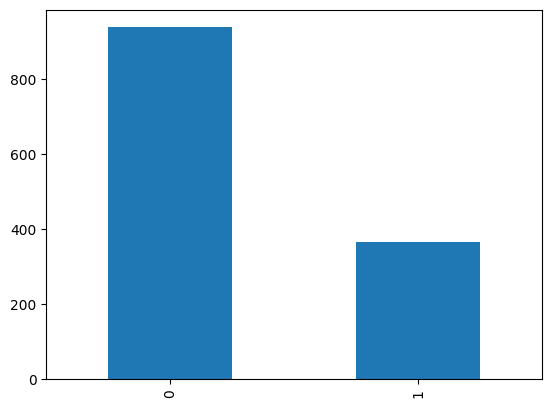

In [18]:
df["IPS"].value_counts().plot(kind="bar")

<AxesSubplot:xlabel='IPS', ylabel='Price'>

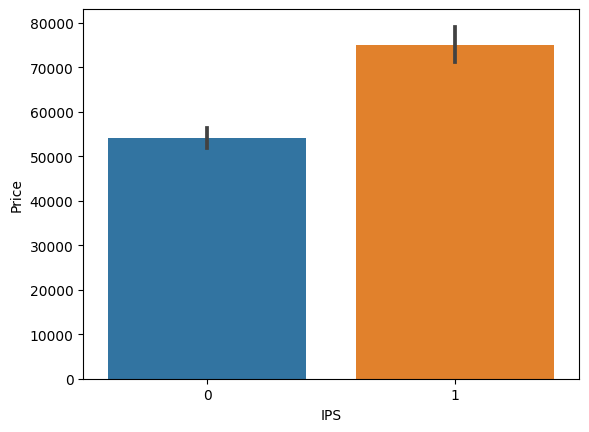

In [19]:
sns.barplot(x=df["IPS"], y=df["Price"])

In [20]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


In [21]:
df["X_res"] = df["ScreenResolution"].str.split("x").apply(lambda x: x[0])
df["Y_res"] = df["ScreenResolution"].str.split("x").apply(lambda x: x[1])

In [22]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


In [23]:
pattern = r'(\b\d+\b)'
df['X_res'] = df['X_res'].str.extract(pattern, expand=False)

In [24]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  X_res             1303 non-null   object 
 14  Y_res             1303 non-null   object 
dtypes: float64(2), int64(2), object(11)
memory usage: 152.8+ KB


In [26]:
df["X_res"] = df["X_res"].astype("int32")
df["Y_res"] = df["Y_res"].astype("int32")

In [27]:
df.corr()["Price"]

Inches         0.068197
Price          1.000000
Touchscreen    0.191226
IPS            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price, dtype: float64

In [28]:
df["ppi"] = np.sqrt((df["X_res"]**2) + (df["Y_res"]**2)) / df["Inches"]
df.corr()["Price"]

Inches         0.068197
Price          1.000000
Touchscreen    0.191226
IPS            0.252208
X_res          0.556529
Y_res          0.552809
ppi            0.473487
Name: Price, dtype: float64

In [29]:
df.drop(columns=["ScreenResolution", "X_res", "Y_res", "Inches"], inplace=True)

In [30]:
 def cpu_processor(text):
        if text == "Intel Core i5" or text == "Intel Core i7" or text == "Intel Core i3":
            return text
        elif "Intel" in text:
            return "Other Intel CPU"
        else:
            return "AMD CPU"

In [31]:
df["CpuName"] = df["Cpu"].apply(lambda x: " ".join(x.split(" ")[0:3]))
df["CpuBrand"] = df["CpuName"].apply(lambda x: cpu_processor(x))

In [32]:
df.drop(columns=["CpuName", "Cpu"], inplace=True)

In [33]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,CpuBrand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


<AxesSubplot:>

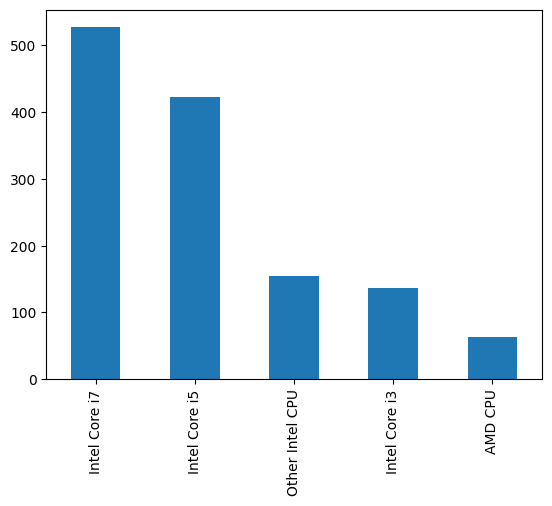

In [34]:
df["CpuBrand"].value_counts().plot(kind="bar")

<AxesSubplot:xlabel='CpuBrand', ylabel='Price'>

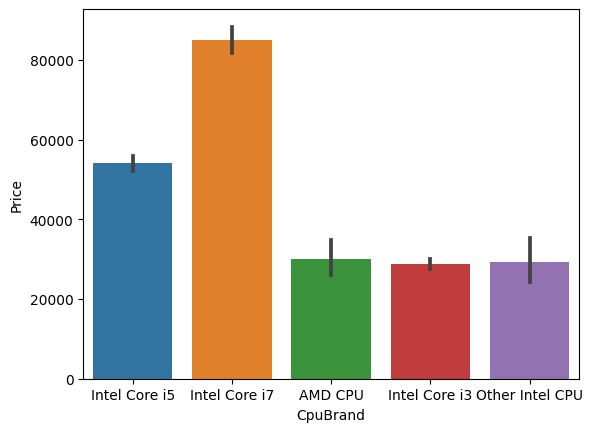

In [35]:
sns.barplot(x=df["CpuBrand"], y=df["Price"])

<AxesSubplot:>

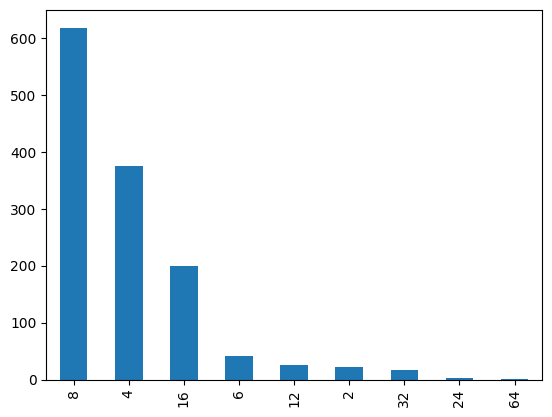

In [36]:
df["Ram"].value_counts().plot(kind="bar")

<AxesSubplot:xlabel='Ram', ylabel='Price'>

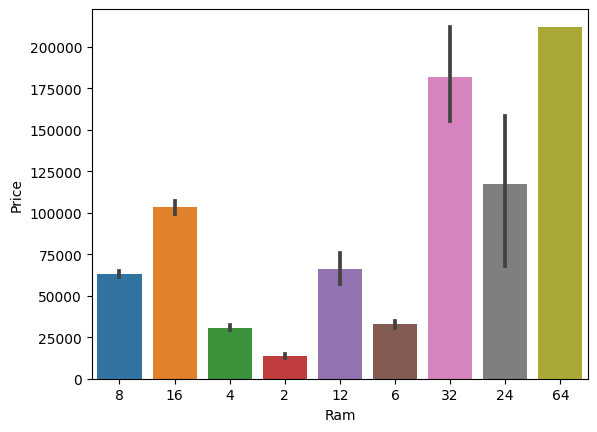

In [37]:
sns.barplot(x=df["Ram"], y=df["Price"])

In [38]:
df["Memory"].head(30)

0                  128GB SSD
1        128GB Flash Storage
2                  256GB SSD
3                  512GB SSD
4                  256GB SSD
5                  500GB HDD
6        256GB Flash Storage
7        256GB Flash Storage
8                  512GB SSD
9                  256GB SSD
10                 500GB HDD
11                 500GB HDD
12                 256GB SSD
13                 256GB SSD
14                 256GB SSD
15                 256GB SSD
16                 256GB SSD
17                 512GB SSD
18                   1TB HDD
19                 128GB SSD
20        32GB Flash Storage
21      128GB SSD +  1TB HDD
22                 500GB HDD
23                 256GB SSD
24                 256GB SSD
25                   1TB HDD
26       128GB Flash Storage
27                 256GB SSD
28    256GB SSD +  256GB SSD
29                   1TB HDD
Name: Memory, dtype: object

In [39]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)

df["first"]= new[0]
df["first"]=df["first"].str.strip()

df["second"]= new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first'] = df['first'].str.replace(r'\D', '')

df["second"].fillna("0", inplace = True)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D', '')

df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_35496\4023190604.py:16: FutureWarning: The default value of regex will change from True to False in a future version.
  df['first'] = df['first'].str.replace(r'\D', '')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_35496\4023190604.py:25: FutureWarning: The default value of regex will change from True to False in a future version.
  df['second'] = df['second'].str.replace(r'\D', '')


In [40]:
df.sample(30)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,CpuBrand,HDD,SSD,Hybrid,Flash_Storage
177,MSI,Gaming,32,512 SSD + 1000 HDD,Nvidia GTX 980 SLI,Windows 10,4.4,149130.7200,0,0,119.723216,Intel Core i7,1000,512,0,0
495,Lenovo,Ultrabook,8,180 SSD,Intel HD Graphics 520,Windows 10,1.3,58554.7200,0,1,125.367428,Intel Core i5,0,180,0,0
1207,Lenovo,Notebook,4,500 HDD,AMD Radeon R2 Graphics,Windows 10,2.2,15930.7200,0,0,100.454670,AMD CPU,500,0,0,0
1253,Lenovo,Notebook,8,256 SSD,Intel HD Graphics 520,Windows 10,1.9,57116.1600,0,1,157.350512,Intel Core i5,0,256,0,0
877,Xiaomi,Ultrabook,8,256 SSD,Nvidia GeForce 940MX,Windows 10,1.28,49816.8000,0,1,165.632118,Intel Core i5,0,256,0,0
1283,Asus,Notebook,4,500 HDD,Nvidia GeForce 920M,Windows 10,2.2,38378.6496,0,0,100.454670,Intel Core i7,500,0,0,0
483,Chuwi,Notebook,4,64 Flash Storage,Intel HD Graphics,Windows 10,1.89,13261.3920,0,0,141.211998,Other Intel CPU,0,0,0,64
297,Dell,Workstation,16,256 SSD,Nvidia Quadro M1200,Windows 10,3.42,153705.3408,0,0,127.335675,Intel Core i7,0,256,0,0
425,Dell,Gaming,8,128 SSD + 1000 HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.62,61751.5200,0,1,141.211998,Intel Core i7,1000,128,0,0
939,Dell,Gaming,16,512 SSD + 1000 HDD,Nvidia GeForce GTX 1080,Windows 10,4.36,146946.2400,0,0,169.780899,Intel Core i7,1000,512,0,0


In [41]:
df.corr()["Price"]

Price            1.000000
Touchscreen      0.191226
IPS              0.252208
ppi              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

In [42]:
df.drop(columns=["Hybrid", "Flash_Storage"], inplace=True)

In [43]:
df["GpuBrands"] = df["Gpu"].str.split(" ").apply(lambda x: x[0])
if not df[df["GpuBrands"] == "ARM"].empty:
    df.drop(index=df[df["GpuBrands"] == "ARM"].index[0], inplace=True)

<AxesSubplot:>

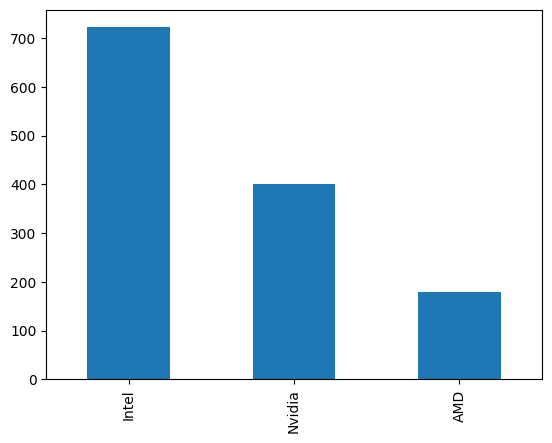

In [44]:
df["GpuBrands"].value_counts().plot(kind="bar")

<AxesSubplot:xlabel='GpuBrands', ylabel='Price'>

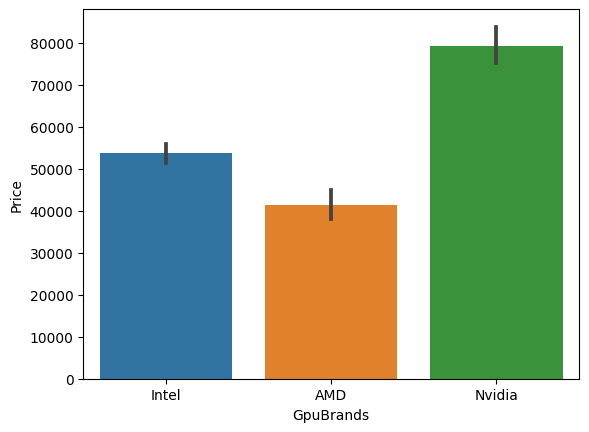

In [45]:
sns.barplot(x=df["GpuBrands"], y=df["Price"])

In [46]:
df.drop(columns=["Gpu"])

,Company,TypeName,Ram,Memory,OpSys,Weight,Price,Touchscreen,IPS,ppi,CpuBrand,HDD,SSD,GpuBrands
0,Apple,Ultrabook,8,128 SSD,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,128 Flash Storage,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,256 SSD,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,512 SSD,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,256 SSD,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,128 SSD,Windows 10,1.8,33992.6400,1,1,157.350512,Intel Core i7,0,128,Intel
1299,Lenovo,2 in 1 Convertible,16,512 SSD,Windows 10,1.3,79866.7200,1,1,276.053530,Intel Core i7,0,512,Intel
1300,Lenovo,Notebook,2,64 Flash Storage,Windows 10,1.5,12201.1200,0,0,111.935204,Other Intel CPU,0,0,Intel
1301,HP,Notebook,6,1000 HDD,Windows 10,2.19,40705.9200,0,0,100.454670,Intel Core i7,1000,0,AMD


In [47]:
df["OpSys"].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

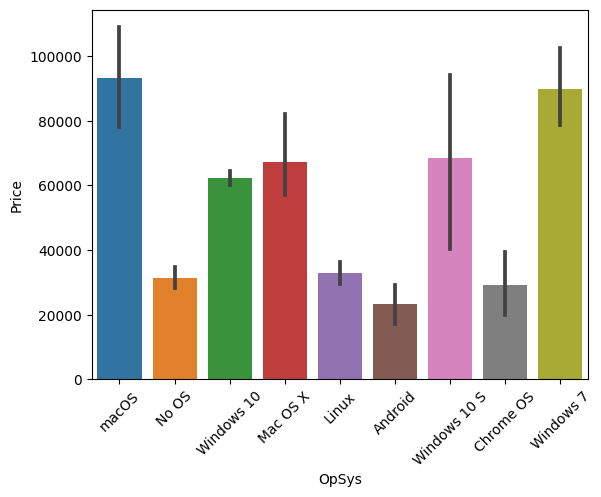

In [48]:
sns.barplot(x=df["OpSys"], y=df["Price"])
plt.xticks(rotation=45)
plt.show()

In [49]:
def extract_os(os):
    os = os.replace(" ", "")
    if os == "Windows10" or os == "Windows7" or os == "Windows10S":
        return "Windows"
    elif os == "MacOSX" or os == "macOS":
        return "Mac"
    else:
        return "Others"

In [50]:
df["OS"] = df["OpSys"].apply(lambda x: extract_os(x))

<AxesSubplot:xlabel='Weight', ylabel='Price'>

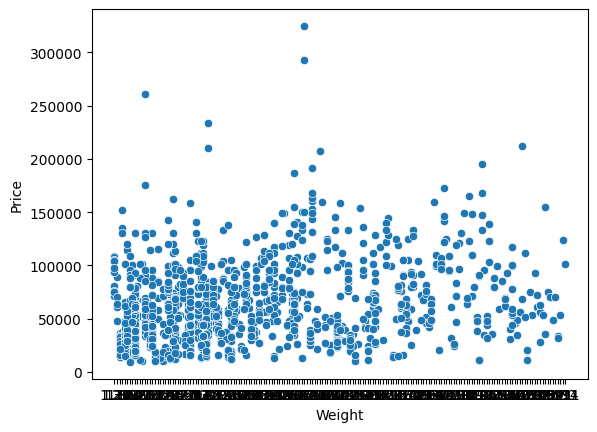

In [51]:
sns.scatterplot(x=df["Weight"], y=df["Price"])

<AxesSubplot:>

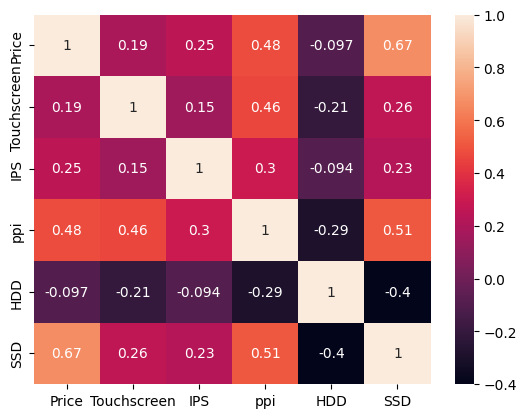

In [52]:
sns.heatmap(df.corr(), annot = True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_35496\4139655757.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df["Price"]))


<AxesSubplot:xlabel='Price', ylabel='Density'>

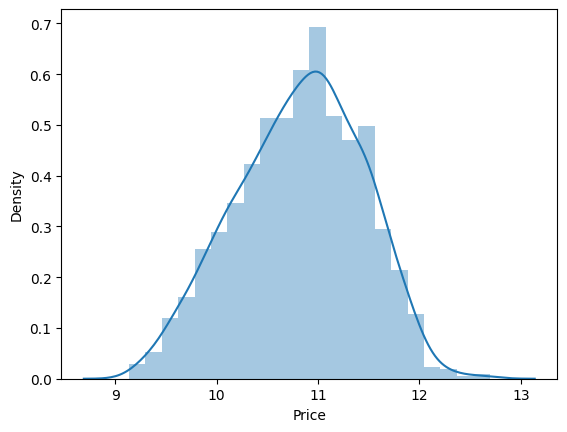

In [53]:
sns.distplot(np.log(df["Price"]))

In [54]:
df.drop(columns=["Memory", "Gpu", "OpSys"], inplace=True)

## Model building

In [80]:
X = df.drop(columns=["Price"])
y = np.log(df["Price"])

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [82]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import GradientBoostingRegressor, BaggingRegressor, ExtraTreesRegressor, HistGradientBoostingRegressor
from sklearn.cross_decomposition import CCA, PLSSVD

In [83]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_absolute_error

In [84]:
ohe = OneHotEncoder()

ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(sparse=False, drop="first"), [0, 1, 7, 10, 11])],
    remainder='passthrough'
)

lr = LinearRegression()

pipeline = Pipeline([
    ("ct", ct),
    ("model", lr)
])

In [85]:
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
print("r2_score: ", r2_score(y_test, y_pred))
print("mean_absolute_error: ", mean_absolute_error(y_test, y_pred))

r2_score:  0.7925383261417067
mean_absolute_error:  0.2137307671276921


C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [91]:
import pandas as pd
from sklearn.metrics import r2_score, mean_absolute_error

# List of all regression models
models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    ElasticNet(),
    SGDRegressor(),
    KNeighborsRegressor(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    AdaBoostRegressor(),
    SVR(),
    MLPRegressor(),
    GaussianProcessRegressor(),
    KernelRidge(),
    BaggingRegressor(),
    ExtraTreesRegressor(),
    HistGradientBoostingRegressor(),
    CCA(n_components=1),
    PLSCanonical(n_components=1),
    PLSRegression(n_components=1),
]

results = []

# Loop through each model
for model in models:
    pipeline = Pipeline([
        ("ct", ct),
        ("model", model)
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    results.append((model.__class__.__name__, r2, mae))

# Create a DataFrame from the results
results_df = pd.DataFrame(results, columns=["Model", "R2 Score", "MAE"])

C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sp

In [96]:
results_df.head()

,Model,R2 Score,MAE
0,LinearRegression,7.925383e-01,2.137308e-01
1,Ridge,7.922104e-01,2.144592e-01
2,Lasso,4.698762e-01,3.566106e-01
3,ElasticNet,5.107576e-01,3.453121e-01
4,SGDRegressor,-1.275718e+28,6.098969e+13


In [97]:
r2_weight = 0.6 
mae_weight = 1 - r2_weight

In [99]:
results_df['combined_score'] = (results_df['R2 Score'] * r2_weight) - (results_df['MAE'] * mae_weight)
results_df.sort_values(by='combined_score', ascending=False)

,Model,R2 Score,MAE,combined_score
7,RandomForestRegressor,8.687985e-01,1.608860e-01,4.569247e-01
14,BaggingRegressor,8.589172e-01,1.693625e-01,4.476053e-01
15,ExtraTreesRegressor,8.541309e-01,1.692642e-01,4.447729e-01
16,HistGradientBoostingRegressor,8.546188e-01,1.703901e-01,4.446152e-01
8,GradientBoostingRegressor,8.367675e-01,1.879928e-01,4.268634e-01
6,DecisionTreeRegressor,7.984168e-01,1.912963e-01,4.025316e-01
0,LinearRegression,7.925383e-01,2.137308e-01,3.900307e-01
1,Ridge,7.922104e-01,2.144592e-01,3.895426e-01
5,KNeighborsRegressor,7.609740e-01,2.219835e-01,3.677910e-01
9,AdaBoostRegressor,7.458967e-01,2.513329e-01,3.470048e-01


`===> RandomForestRegressor`

In [101]:
pipeline = Pipeline([
        ("ct", ct),
        ("model", RandomForestRegressor())
    ])
    
pipeline.fit(X_train, y_train)

C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [0, 1, 7, 10, 11])])),
                ('model', RandomForestRegressor())])

In [102]:
import pickle

In [103]:
pickle.dump(df, open("df.pkl", "wb"))
pickle.dump(pipeline, open("model.pkl", "wb"))

In [113]:
df.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,ppi,CpuBrand,HDD,SSD,GpuBrands,OS
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [111]:
sorted(list(map(int, df["Ram"].unique().tolist())))

[2, 4, 6, 8, 12, 16, 24, 32, 64]